# Kütüphaneler

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Verinin okuma ve tanıma

In [2]:
veri = pd.read_csv('arac_ilanlari.csv')
veri.head()

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_kategorisi,arac_tagleri,ilan_konumu,arac_ozellikleri
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İstanbul, Ümraniye","['143.000 km', '2016 model', 'Dizel', '110 hp'..."
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İzmir, Konak","['80.000 km', '2017 model', 'Dizel', '110 hp',..."
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sportback 1.6', 'Marka': 'Audi',...","Adana, Seyhan","['177.000 km', '2011 model', 'Benzin & LPG', '..."
3,1101851921,2020/A3 35 1.5 TFSİ/150 DESIGN+STRONIC PKT-SUN...,1380000.0,TL,2023-05-26 09:22:35.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sedan 35 TFSI', 'Marka': 'Audi',...","İstanbul, Sarıyer","['33.000 km', '2020 model', 'Benzin', '150 hp'..."
4,1090594643,2015 MODEL,530000.0,TL,2023-05-26 09:21:55.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.4 TDI Trendline', 'Marka': 'Volks...","Kırklareli, Lüleburgaz","['125.000 km', '2015 model', 'Dizel', '75 hp',..."


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556756 entries, 0 to 556755
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ilan_id           556756 non-null  int64  
 1   ilan_basligi      556756 non-null  object 
 2   fiyat             556756 non-null  float64
 3   fiyat_kuru        556756 non-null  object 
 4   ilan_tarihi       556756 non-null  object 
 5   ilan_kategorisi   556756 non-null  object 
 6   arac_tagleri      556756 non-null  object 
 7   ilan_konumu       556756 non-null  object 
 8   arac_ozellikleri  556756 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 38.2+ MB


# Verileri Düzenleme

In [4]:
veri['arac_tagleri'] = veri['arac_tagleri'].apply(ast.literal_eval)

veri[['Model', 'Marka', 'Seri']] = pd.DataFrame(veri['arac_tagleri'].tolist(), index=veri.index)

In [5]:
veri['arac_ozellikleri'] = veri['arac_ozellikleri'].apply(ast.literal_eval)

veri[['Km', '_Yil', 'Yakit', 'Güc', 'Tipi',]] = pd.DataFrame(veri['arac_ozellikleri'].tolist(), index=veri.index)

In [6]:
veri['Km'] = veri['Km'].str.replace(' km', '', case=False)
veri['_Yil'] = veri['_Yil'].str.replace(' model', '', case=False)
veri['Güc'] = veri['Güc'].str.replace(' hp', '', case=False)

In [7]:
veri['Km'] = veri['Km'].str.replace('.', '').astype(float)
veri['_Yil'] = veri['_Yil'].str.replace('.', '').astype(float)

In [8]:
def parse_power(value):
    if pd.isna(value): 
        return 0  

    parts = value.split('-')
    if len(parts) > 1:
        parsed_value = parts[1].split()[0]  
        parsed_value = ''.join(filter(str.isdigit, parsed_value))  
        if parsed_value.isdigit():
            return int(parsed_value)
    else:
        parsed_value = value.split()[0]
        parsed_value = ''.join(filter(str.isdigit, parsed_value))
        if parsed_value.isdigit():
            return int(parsed_value)
    
    
    return 0  

veri['Güc'] = veri['Güc'].apply(parse_power).astype("float")

In [9]:
veri['silindir_hacmi'] = veri.apply(lambda row: '1.5' if row['Marka'] == 'Audi' and row['Model'].split()[2] == '35'
                                    else ('1.0' if row['Marka'] == 'Audi' and row['Model'].split()[2] == '30' 
                                    else (row['Model'].split()[2] if row['Marka'] == 'Audi' 
                                    else row['Model'][:3])), axis=1)
veri.loc[veri["silindir_hacmi"] == "Exc" , "silindir_hacmi"] = 1.5
veri.loc[veri["silindir_hacmi"] == "Aut", "silindir_hacmi"] = 1.5
veri.loc[veri["silindir_hacmi"] == "Joy", "silindir_hacmi"] = 1.3
veri["silindir_hacmi"]=veri["silindir_hacmi"].astype("float")

In [10]:
veri.head()

,ilan_id,ilan_basligi,fiyat,fiyat_kuru,ilan_tarihi,ilan_kategorisi,arac_tagleri,ilan_konumu,arac_ozellikleri,Model,Marka,Seri,Km,_Yil,Yakit,Güc,Tipi,silindir_hacmi
0,1080850207,DEĞİŞENSİZ YENİ MUAYENELİ RENAULT MEGANE FUL D...,830000.0,TL,2023-05-26 09:23:29.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İstanbul, Ümraniye","[143.000 km, 2016 model, Dizel, 110 hp, Otomatik]",1.5 dCi Icon,Renault,Megane,143000.0,2016.0,Dizel,110.0,Otomatik,1.5
1,1101850722,"KAZA,BOYA,DEĞİŞEN,TRAMER YOK. 80.000 km.",905000.0,TL,2023-05-26 09:23:13.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.5 dCi Icon', 'Marka': 'Renault', ...","İzmir, Konak","[80.000 km, 2017 model, Dizel, 110 hp, Otomatik]",1.5 dCi Icon,Renault,Megane,80000.0,2017.0,Dizel,110.0,Otomatik,1.5
2,1101855061,HATASIZ AYARINDA MASRAFSIZ AUDİ A3,695000.0,TL,2023-05-26 09:22:58.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sportback 1.6', 'Marka': 'Audi',...","Adana, Seyhan","[177.000 km, 2011 model, Benzin & LPG, 102 hp,...",A3 Sportback 1.6,Audi,A3,177000.0,2011.0,Benzin & LPG,102.0,Manuel,1.6
3,1101851921,2020/A3 35 1.5 TFSİ/150 DESIGN+STRONIC PKT-SUN...,1380000.0,TL,2023-05-26 09:22:35.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': 'A3 Sedan 35 TFSI', 'Marka': 'Audi',...","İstanbul, Sarıyer","[33.000 km, 2020 model, Benzin, 150 hp, Otomatik]",A3 Sedan 35 TFSI,Audi,A3,33000.0,2020.0,Benzin,150.0,Otomatik,1.5
4,1090594643,2015 MODEL,530000.0,TL,2023-05-26 09:21:55.000000,"[{'id': 3517, 'label': 'Vasıta'}, {'id': 3530,...","{'Model': '1.4 TDI Trendline', 'Marka': 'Volks...","Kırklareli, Lüleburgaz","[125.000 km, 2015 model, Dizel, 75 hp, Manuel]",1.4 TDI Trendline,Volkswagen,Polo,125000.0,2015.0,Dizel,75.0,Manuel,1.4


# Gereksiz sütunları kaldırma

In [11]:
veri = veri.drop(['ilan_id', 'ilan_basligi', 'fiyat_kuru', 'ilan_kategorisi', 'arac_tagleri', 'arac_ozellikleri','Model'], axis=1)
veri.head()

,fiyat,ilan_tarihi,ilan_konumu,Marka,Seri,Km,_Yil,Yakit,Güc,Tipi,silindir_hacmi
0,830000.0,2023-05-26 09:23:29.000000,"İstanbul, Ümraniye",Renault,Megane,143000.0,2016.0,Dizel,110.0,Otomatik,1.5
1,905000.0,2023-05-26 09:23:13.000000,"İzmir, Konak",Renault,Megane,80000.0,2017.0,Dizel,110.0,Otomatik,1.5
2,695000.0,2023-05-26 09:22:58.000000,"Adana, Seyhan",Audi,A3,177000.0,2011.0,Benzin & LPG,102.0,Manuel,1.6
3,1380000.0,2023-05-26 09:22:35.000000,"İstanbul, Sarıyer",Audi,A3,33000.0,2020.0,Benzin,150.0,Otomatik,1.5
4,530000.0,2023-05-26 09:21:55.000000,"Kırklareli, Lüleburgaz",Volkswagen,Polo,125000.0,2015.0,Dizel,75.0,Manuel,1.4


# HeatMap

In [12]:
veri.head()

,fiyat,ilan_tarihi,ilan_konumu,Marka,Seri,Km,_Yil,Yakit,Güc,Tipi,silindir_hacmi
0,830000.0,2023-05-26 09:23:29.000000,"İstanbul, Ümraniye",Renault,Megane,143000.0,2016.0,Dizel,110.0,Otomatik,1.5
1,905000.0,2023-05-26 09:23:13.000000,"İzmir, Konak",Renault,Megane,80000.0,2017.0,Dizel,110.0,Otomatik,1.5
2,695000.0,2023-05-26 09:22:58.000000,"Adana, Seyhan",Audi,A3,177000.0,2011.0,Benzin & LPG,102.0,Manuel,1.6
3,1380000.0,2023-05-26 09:22:35.000000,"İstanbul, Sarıyer",Audi,A3,33000.0,2020.0,Benzin,150.0,Otomatik,1.5
4,530000.0,2023-05-26 09:21:55.000000,"Kırklareli, Lüleburgaz",Volkswagen,Polo,125000.0,2015.0,Dizel,75.0,Manuel,1.4


# Pasta Grafiği 

In [13]:
def pie_visualization(dataframe, column):
    fig, ax = plt.subplots(figsize=(10, 10))
    dataframe[column].value_counts().plot.pie(legend=True, autopct="%1.1f%%", ax=ax)

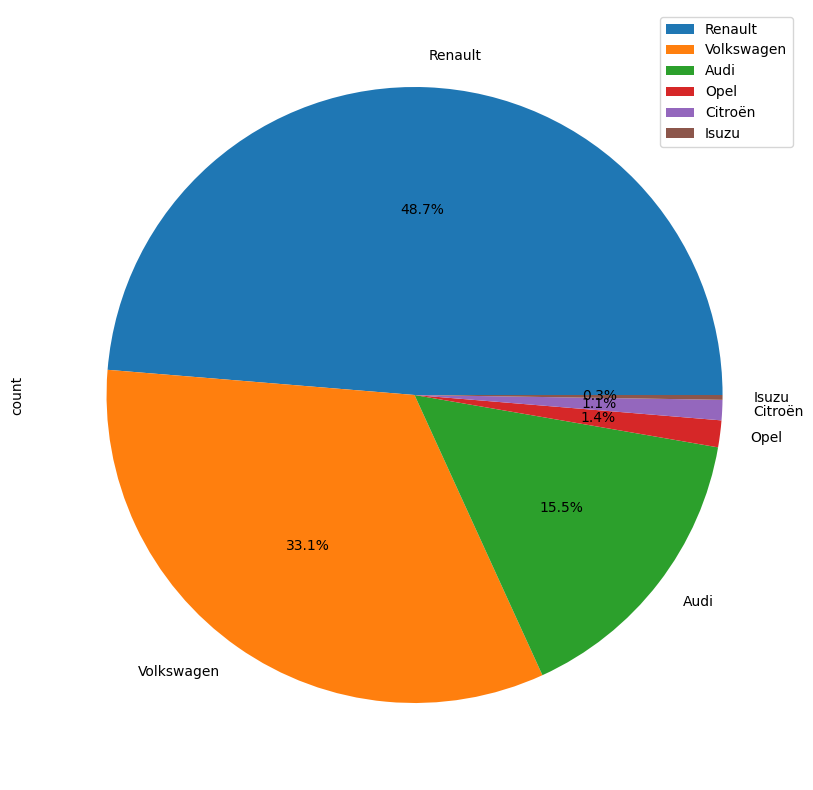

In [14]:
pie_visualization(veri, 'Marka')

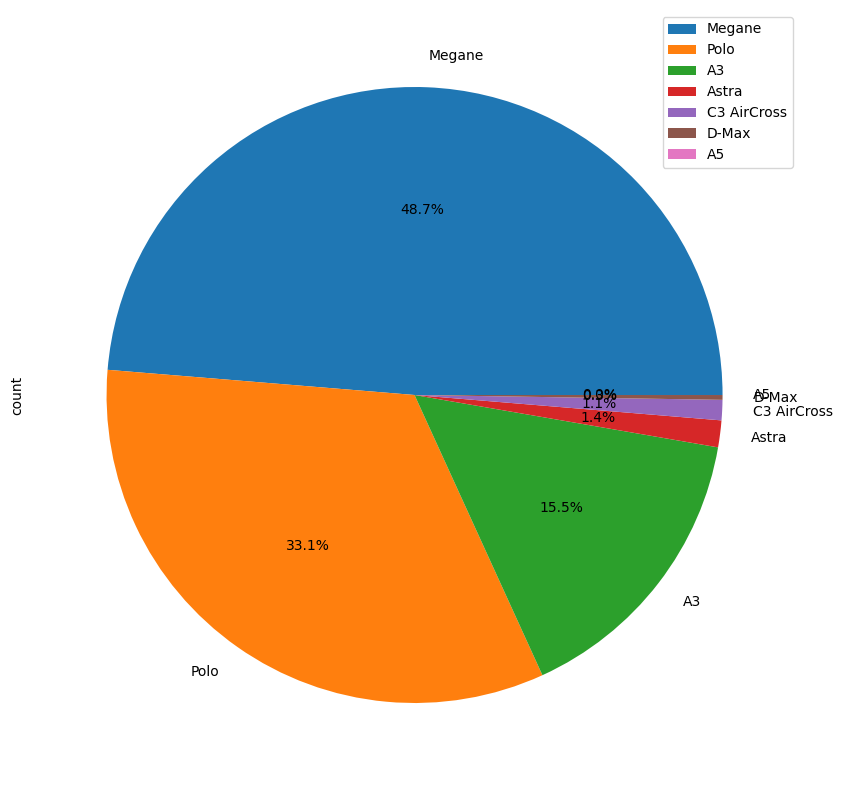

In [15]:
pie_visualization(veri, 'Seri')

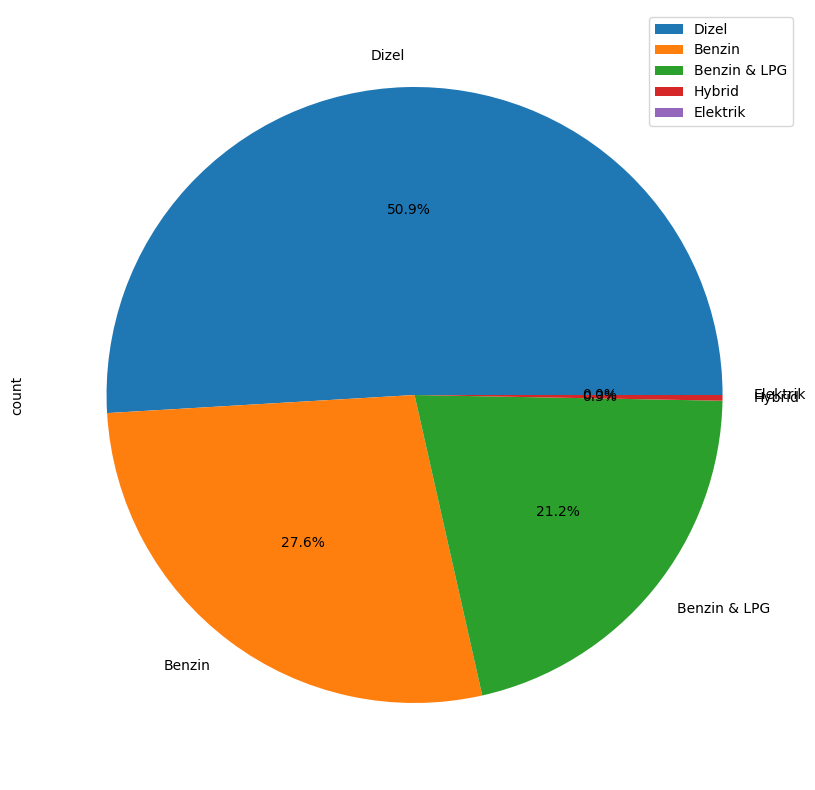

In [16]:
pie_visualization(veri, 'Yakit')

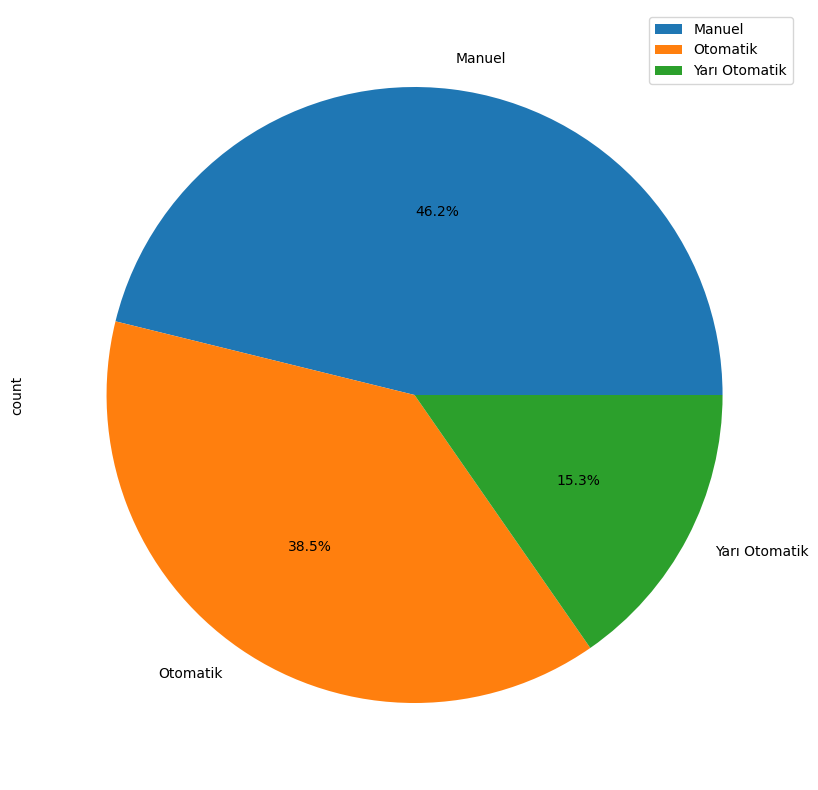

In [17]:
pie_visualization(veri, 'Tipi')

# Histogram

In [18]:
def visualization(dataframe,columns):
    dataframe[columns].hist(grid=True,figsize=(12,8))

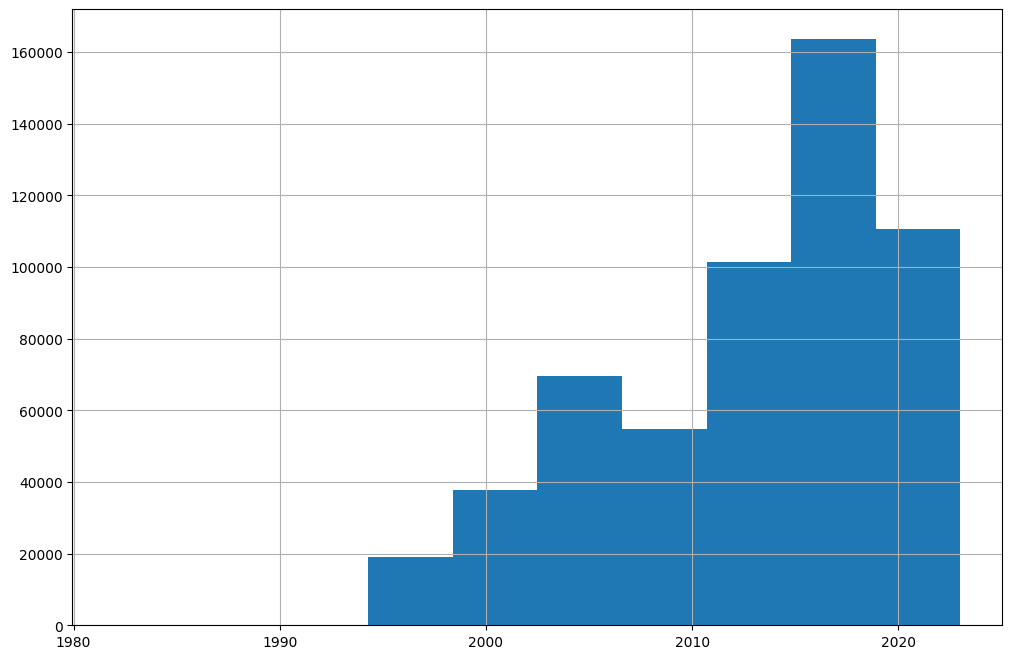

In [19]:
visualization(veri,columns="_Yil")

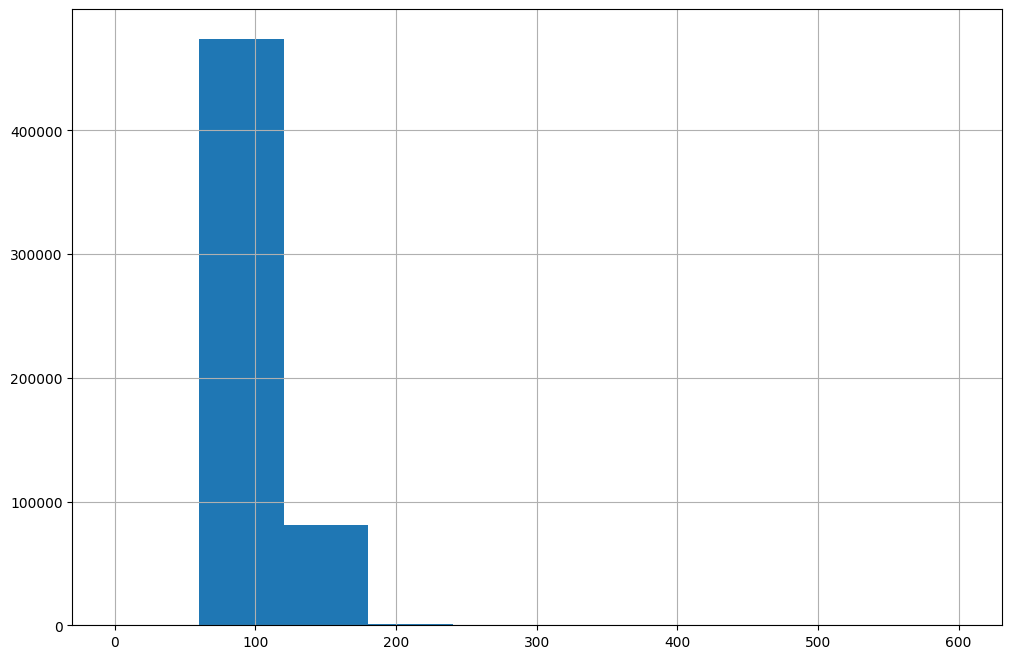

In [20]:
visualization(veri,columns="Güc") 

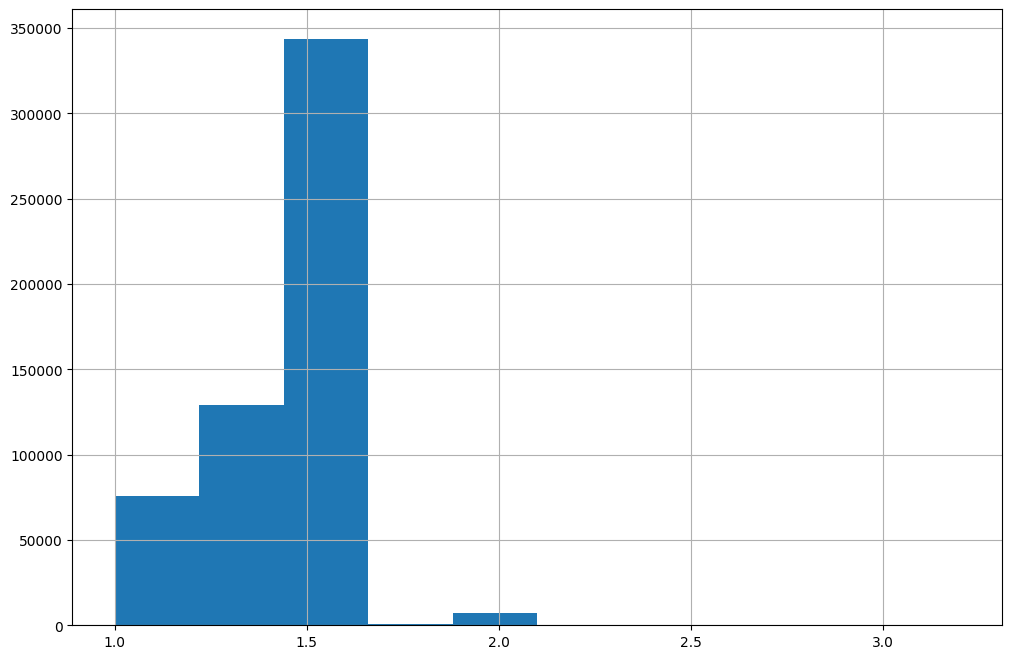

In [21]:
visualization(veri,columns="silindir_hacmi") 

# Boxplot 

In [22]:
def graph(x,df):
    sns.boxplot(x=x, data=df)
    plt.figure(figsize=(10,10))
    plt.show()

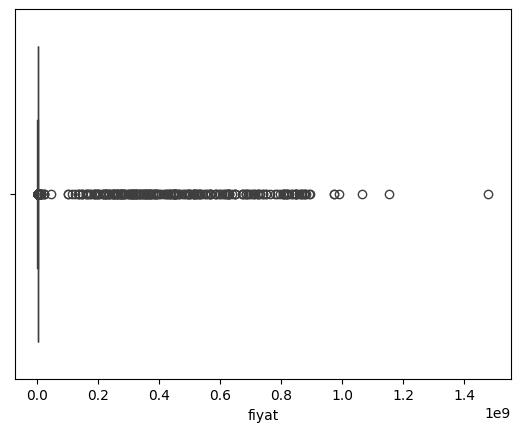

<Figure size 1000x1000 with 0 Axes>

In [23]:
graph("fiyat",veri)

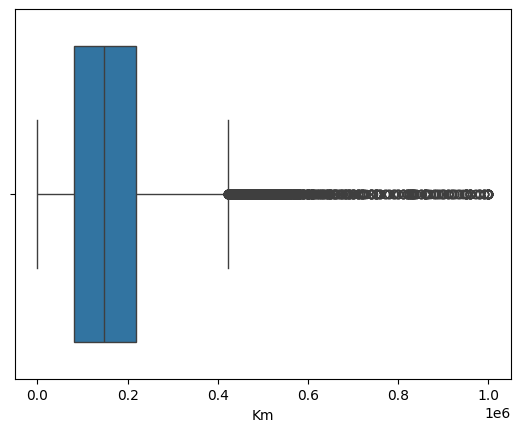

<Figure size 1000x1000 with 0 Axes>

In [24]:
graph("Km",veri)

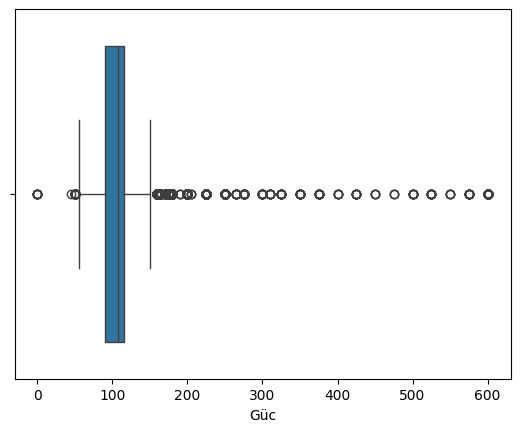

<Figure size 1000x1000 with 0 Axes>

In [25]:
graph("Güc",veri)

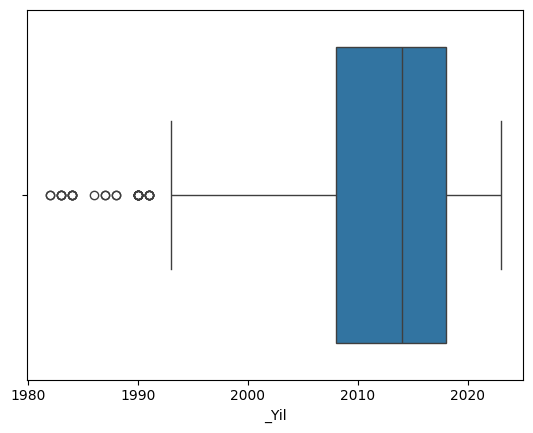

<Figure size 1000x1000 with 0 Axes>

In [26]:
graph("_Yil",veri)

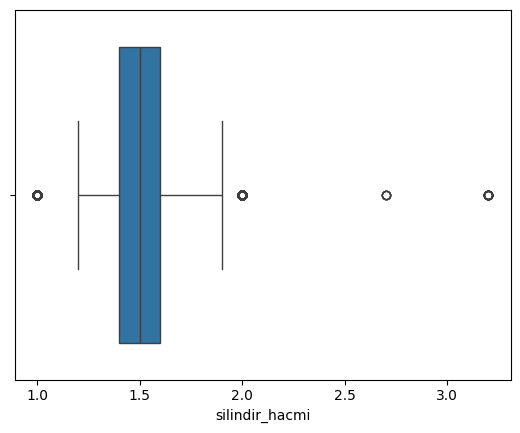

<Figure size 1000x1000 with 0 Axes>

In [27]:
graph("silindir_hacmi",veri)

# Çubuk Grafiği

In [28]:
def plotBar(degisken, n=5):
    data_ = veri[degisken]  
    data_sayma = data_.value_counts()
    data_sayma = data_sayma[:n]
    plt.figure()
    plt.bar(data_sayma.index, data_sayma, color="purple")
    plt.xticks(data_sayma.index, data_sayma.index.values)
    plt.xticks(rotation=90)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, data_sayma))

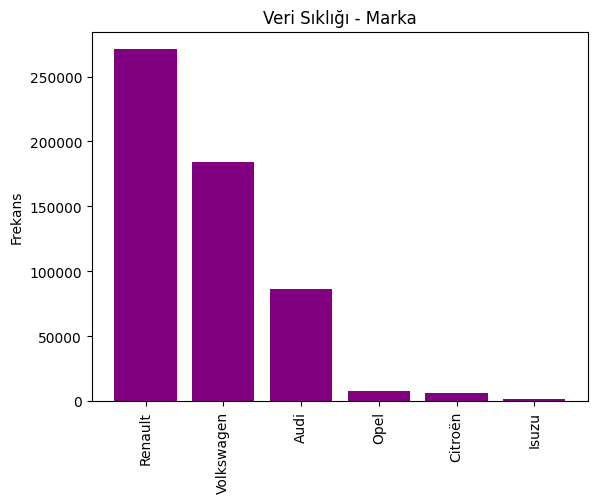

Marka: 
 Marka
Renault       271120
Volkswagen    184385
Audi           86109
Opel            7824
Citroën         5923
Isuzu           1392
Name: count, dtype: int64


In [29]:
plotBar('Marka', n=6)  

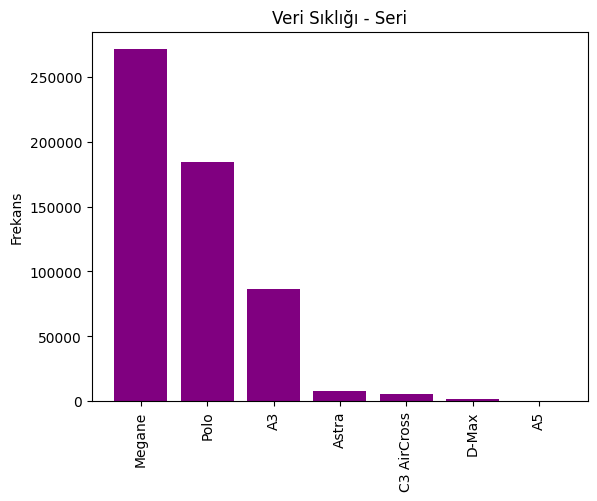

Seri: 
 Seri
Megane         271120
Polo           184385
A3              86105
Astra            7824
C3 AirCross      5923
D-Max            1392
A5                  4
Name: count, dtype: int64


In [30]:
plotBar('Seri', n=20)  

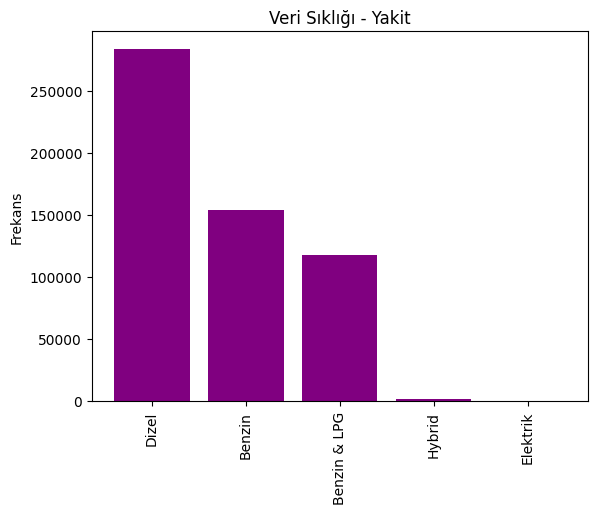

Yakit: 
 Yakit
Dizel           283594
Benzin          153611
Benzin & LPG    117898
Hybrid            1651
Elektrik             1
Name: count, dtype: int64


In [31]:
plotBar('Yakit', n=10)

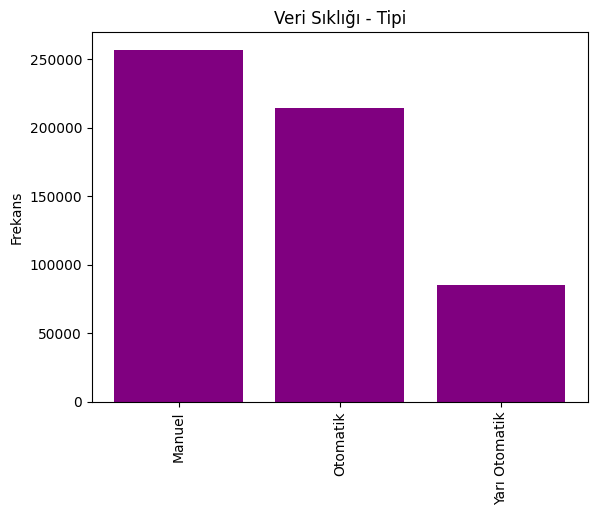

Tipi: 
 Tipi
Manuel           256947
Otomatik         214375
Yarı Otomatik     85373
Name: count, dtype: int64


In [32]:
plotBar('Tipi', n=10)

# Encoding İşlemler

In [33]:
veri['Seri'] = veri['Seri'].apply(lambda x: x if x in [ "Megane","Polo","A3"] else 'Dıger')
veri['Yakit'] = veri['Yakit'].apply(lambda x: x if x in [ "Dizel","Benzin","Benzin & LPG"] else 'Dıger')

In [34]:
veri= pd.get_dummies(veri, columns=['Seri','Yakit','Tipi'])

In [35]:
pd.set_option('display.max_columns', None) 
veri.head()

,fiyat,ilan_tarihi,ilan_konumu,Marka,Km,_Yil,Güc,silindir_hacmi,Seri_A3,Seri_Dıger,Seri_Megane,Seri_Polo,Yakit_Benzin,Yakit_Benzin & LPG,Yakit_Dizel,Yakit_Dıger,Tipi_Manuel,Tipi_Otomatik,Tipi_Yarı Otomatik
0,830000.0,2023-05-26 09:23:29.000000,"İstanbul, Ümraniye",Renault,143000.0,2016.0,110.0,1.5,False,False,True,False,False,False,True,False,False,True,False
1,905000.0,2023-05-26 09:23:13.000000,"İzmir, Konak",Renault,80000.0,2017.0,110.0,1.5,False,False,True,False,False,False,True,False,False,True,False
2,695000.0,2023-05-26 09:22:58.000000,"Adana, Seyhan",Audi,177000.0,2011.0,102.0,1.6,True,False,False,False,False,True,False,False,True,False,False
3,1380000.0,2023-05-26 09:22:35.000000,"İstanbul, Sarıyer",Audi,33000.0,2020.0,150.0,1.5,True,False,False,False,True,False,False,False,False,True,False
4,530000.0,2023-05-26 09:21:55.000000,"Kırklareli, Lüleburgaz",Volkswagen,125000.0,2015.0,75.0,1.4,False,False,False,True,False,False,True,False,True,False,False


# Aykırı değer analizi

In [36]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range    
    return low_limit, up_limit

In [37]:
outlier_thresholds(veri,'fiyat')

(-327500.0, 1492500.0)

In [38]:
veri = veri[(veri["fiyat"]<1492500.0) & (veri["fiyat"] > 100000.0)]

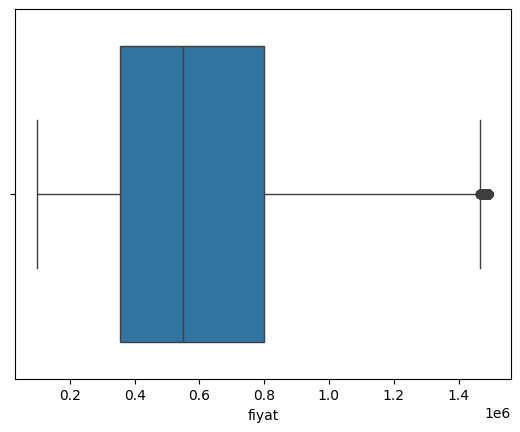

<Figure size 1000x1000 with 0 Axes>

In [39]:
graph("fiyat",veri)

In [40]:
outlier_thresholds(veri,'_Yil')

(1990.5, 2034.5)

In [41]:
veri = veri[(veri["_Yil"] > 1990)]

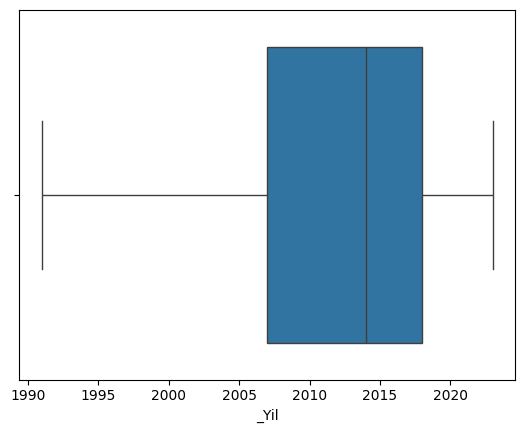

<Figure size 1000x1000 with 0 Axes>

In [42]:
graph("_Yil",veri)

In [43]:
outlier_thresholds(veri,'Güc')

(52.5, 152.5)

In [44]:
veri = veri[(veri["Güc"] > 52.5) & (veri["Güc"] < 152.5) ]

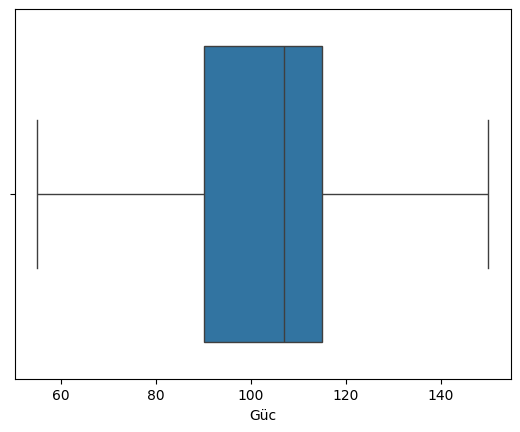

<Figure size 1000x1000 with 0 Axes>

In [45]:
graph("Güc",veri)

In [46]:
outlier_thresholds(veri,'Km')

(-116625.0, 420375.0)

In [47]:
veri = veri[(veri["Km"] > 0) & (veri["Km"] < 416500.0) ]

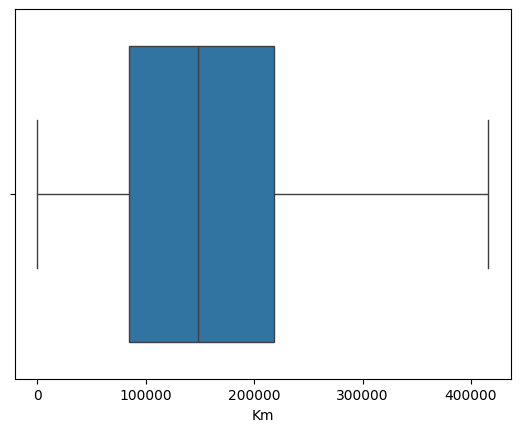

<Figure size 1000x1000 with 0 Axes>

In [48]:
graph("Km",veri)

In [49]:
veri = veri.drop(['Marka'], axis=1)
veri.head()

,fiyat,ilan_tarihi,ilan_konumu,Km,_Yil,Güc,silindir_hacmi,Seri_A3,Seri_Dıger,Seri_Megane,Seri_Polo,Yakit_Benzin,Yakit_Benzin & LPG,Yakit_Dizel,Yakit_Dıger,Tipi_Manuel,Tipi_Otomatik,Tipi_Yarı Otomatik
0,830000.0,2023-05-26 09:23:29.000000,"İstanbul, Ümraniye",143000.0,2016.0,110.0,1.5,False,False,True,False,False,False,True,False,False,True,False
1,905000.0,2023-05-26 09:23:13.000000,"İzmir, Konak",80000.0,2017.0,110.0,1.5,False,False,True,False,False,False,True,False,False,True,False
2,695000.0,2023-05-26 09:22:58.000000,"Adana, Seyhan",177000.0,2011.0,102.0,1.6,True,False,False,False,False,True,False,False,True,False,False
3,1380000.0,2023-05-26 09:22:35.000000,"İstanbul, Sarıyer",33000.0,2020.0,150.0,1.5,True,False,False,False,True,False,False,False,False,True,False
4,530000.0,2023-05-26 09:21:55.000000,"Kırklareli, Lüleburgaz",125000.0,2015.0,75.0,1.4,False,False,False,True,False,False,True,False,True,False,False


In [50]:
veri['beygir_gucu'] = veri['Güc'] / veri['silindir_hacmi']

In [51]:
X = veri.drop(["fiyat","ilan_tarihi","ilan_konumu",],axis=1) 
y = veri["fiyat"] 

In [52]:
X

,Km,_Yil,Güc,silindir_hacmi,Seri_A3,Seri_Dıger,Seri_Megane,Seri_Polo,Yakit_Benzin,Yakit_Benzin & LPG,Yakit_Dizel,Yakit_Dıger,Tipi_Manuel,Tipi_Otomatik,Tipi_Yarı Otomatik,beygir_gucu
0,143000.0,2016.0,110.0,1.5,False,False,True,False,False,False,True,False,False,True,False,73.333333
1,80000.0,2017.0,110.0,1.5,False,False,True,False,False,False,True,False,False,True,False,73.333333
2,177000.0,2011.0,102.0,1.6,True,False,False,False,False,True,False,False,True,False,False,63.750000
3,33000.0,2020.0,150.0,1.5,True,False,False,False,True,False,False,False,False,True,False,100.000000
4,125000.0,2015.0,75.0,1.4,False,False,False,True,False,False,True,False,True,False,False,53.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556750,235000.0,2007.0,98.0,1.4,False,False,True,False,False,True,False,False,True,False,False,70.000000
556751,57000.0,2016.0,90.0,1.2,False,False,False,True,True,False,False,False,False,True,False,75.000000
556753,205000.0,2015.0,75.0,1.4,False,False,False,True,False,False,True,False,True,False,False,53.571429
556754,22000.0,2020.0,115.0,1.5,False,False,True,False,False,False,True,False,False,True,False,76.666667


In [53]:
y

0          830000.0
1          905000.0
2          695000.0
3         1380000.0
4          530000.0
            ...    
556750     360000.0
556751     720000.0
556753     469500.0
556754     997500.0
556755     560000.0
Name: fiyat, Length: 543039, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [55]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Test Seti R^2 Skoru: {r2}")

Test Seti R^2 Skoru: 0.7736221667756875


In [57]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Test Seti R^2 Skoru: {r2}")

Test Seti R^2 Skoru: 0.8004908157076004


In [58]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Test Seti R^2 Skoru: {r2}")

Test Seti R^2 Skoru: 0.8200613453857308


In [59]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Test Seti R^2 Skoru: {r2}")

Test Seti R^2 Skoru: 0.8194582162729733


In [60]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Test Seti R^2 Skoru: {r2}")

Test Seti R^2 Skoru: 0.807074013665617


In [61]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Test Seti R^2 Skoru: {r2}")

Test Seti R^2 Skoru: 0.8286331204068587


In [63]:
import tkinter as tk
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import joblib

# Veri çerçevenizi burada tanımlayın
# one-hot kodlanmış sütunlar daha önce oluşturulmuş olsun
data = pd.DataFrame(columns=['Km', '_Yil', 'Güc', 'silindir_hacmi','Seri_A3',
       'Seri_Dıger','Seri_Megane', 'Seri_Polo', 'Yakit_Benzin',
       'Yakit_Benzin & LPG', 'Yakit_Dizel', 'Yakit_Dıger', 'Tipi_Manuel',
       'Tipi_Otomatik', 'Tipi_Yarı Otomatik', 'beygir_gucu'])

# Tkinter kullanıcı arayüzünü oluşturmak için bir sınıf tanımlayalım
class GUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Araç Fiyat Tahmin Uygulaması")
        
        # KM etiketi ve giriş kutusu
        self.km_label = tk.Label(root, text="Kilometre Bilgisi (KM):")
        self.km_label.pack()
        self.km_entry = tk.Entry(root)
        self.km_entry.pack()
        
        # Yıl etiketi ve giriş kutusu
        self.yil_model_label = tk.Label(root, text="Araç Yılı:")
        self.yil_model_label.pack()
        self.yil_model_entry = tk.Entry(root)
        self.yil_model_entry.pack()
        
        # Motor gücü etiketi ve giriş kutusu
        self.motor_gucu_label = tk.Label(root, text="Motor Gücü (Beygir HP):")
        self.motor_gucu_label.pack()
        self.motor_gucu_entry = tk.Entry(root)
        self.motor_gucu_entry.pack()
        
        # Silindir hacmi etiketi ve giriş kutusu
        self.silindir_hacmi_label = tk.Label(root, text="Silindir Hacmi (cc):")
        self.silindir_hacmi_label.pack()
        self.silindir_hacmi_entry = tk.Entry(root)
        self.silindir_hacmi_entry.pack()

        # Araç model seçenekleri
        self.model_label = tk.Label(root, text="Araç Modeli:")
        self.model_label.pack()
        self.model_var = tk.StringVar()
        self.model_var.set("Seri_A3")
        self.model_A3_radio = tk.Radiobutton(root, text="Audi A3", variable=self.model_var, value="Seri_A3")
        self.model_A3_radio.pack()
        self.model_Megane_radio = tk.Radiobutton(root, text="Renault Megane", variable=self.model_var, value="Seri_Megane")
        self.model_Megane_radio.pack()
        self.model_Polo_radio = tk.Radiobutton(root, text="Volkswagen Polo", variable=self.model_var, value="Seri_Polo")
        self.model_Polo_radio.pack()
        self.model_Dıger_radio = tk.Radiobutton(root, text="Diğer", variable=self.model_var, value="Seri_Dıger")
        self.model_Dıger_radio.pack()
        
        # Yakıt türü seçenekleri
        self.yakit_turu_label = tk.Label(root, text="Yakıt Türü:")
        self.yakit_turu_label.pack()
        self.yakit_turu_var = tk.StringVar()
        self.yakit_turu_var.set("Yakit_Benzin")
        self.yakit_turu_Benzin_radio = tk.Radiobutton(root, text="Benzin", variable=self.yakit_turu_var, value="Yakit_Benzin")
        self.yakit_turu_Benzin_radio.pack()
        self.yakit_turu_Benzin_LPG_radio = tk.Radiobutton(root, text="Benzin & LPG", variable=self.yakit_turu_var, value="Yakit_Benzin & LPG")
        self.yakit_turu_Benzin_LPG_radio.pack()
        self.yakit_turu_Dizel_radio = tk.Radiobutton(root, text="Dizel", variable=self.yakit_turu_var, value="Yakit_Dizel")
        self.yakit_turu_Dizel_radio.pack()
        self.yakit_turu_Dıger_radio = tk.Radiobutton(root, text="Diğer", variable=self.yakit_turu_var, value="Yakit_Dıger")
        self.yakit_turu_Dıger_radio.pack()
        
        # Vites türü seçenekleri
        self.vites_turu_label = tk.Label(root, text="Vites Türü:")
        self.vites_turu_label.pack()
        self.vites_turu_var = tk.StringVar()
        self.vites_turu_var.set("Tipi_Manuel")
        self.vites_turu_manuel_radio = tk.Radiobutton(root, text="Manuel", variable=self.vites_turu_var, value="Tipi_Manuel")
        self.vites_turu_manuel_radio.pack()
        self.vites_turu_otomatik_radio = tk.Radiobutton(root, text="Otomatik", variable=self.vites_turu_var, value="Tipi_Otomatik")
        self.vites_turu_otomatik_radio.pack()
        self.vites_turu_yari_otomatik_radio = tk.Radiobutton(root, text="Yarı Otomatik", variable=self.vites_turu_var, value="Tipi_Yarı Otomatik")
        self.vites_turu_yari_otomatik_radio.pack()

        # Tahmin düğmesi
        self.predict_button = tk.Button(root, text="Fiyat Tahmini Yap", command=self.predict)
        self.predict_button.pack()

        # Tahmin sonucunu göstermek için bir etiket
        self.result_label = tk.Label(root, text="")
        self.result_label.pack()

    def predict(self):
        # Kullanıcının girdilerini alın
        km = float(self.km_entry.get())
        yil_model = float(self.yil_model_entry.get())
        motor_gucu = float(self.motor_gucu_entry.get())
        silindir_hacmi = float(self.silindir_hacmi_entry.get())
        beygir_gucu=float(motor_gucu/silindir_hacmi)
        
        modell = self.model_var.get()
        yakit_turu = self.yakit_turu_var.get()
        vites_turu = self.vites_turu_var.get()

        data["Km"] = [km]
        data["_Yil"] = [yil_model]
        data["Güc"] = [motor_gucu]
        data["beygir_gucu"] = [beygir_gucu]
        data["silindir_hacmi"] = [silindir_hacmi]
        
        data["Seri_A3"] = [1 if modell == "Seri_A3" else 0]
        data["Seri_Dıger"] = [1 if modell == "Seri_Dıger" else 0]
        data["Seri_Megane"] = [1 if modell == "Seri_Megane" else 0]
        data["Seri_Polo"] = [1 if modell == "Seri_Polo" else 0]
        
        data["Yakit_Benzin"] = [1 if yakit_turu == "Yakit_Benzin" else 0]
        data["Yakit_Benzin & LPG"] = [1 if yakit_turu == "Yakit_Benzin & LPG" else 0]
        data["Yakit_Dizel"] = [1 if yakit_turu == "Yakit_Dizel" else 0]
        
        data["Tipi_Manuel"] = [1 if vites_turu == "Tipi_Manuel" else 0]
        data["Tipi_Otomatik"] = [1 if vites_turu == "Tipi_Otomatik" else 0]

        # Verileri ölçeklendirin
        scaled_data = scaler.transform(data.values)
        
        # Tahmin yapın
        prediction = model.predict(scaled_data)

        # Tahmin sonucunu gösterin
        self.result_label.config(text=f"Fiyat Tahmini: {prediction[0]:,.2f} TL")

# Tkinter uygulamasını başlatın
root = tk.Tk()
app = GUI(root)
root.mainloop()
